In [9]:
import numpy as np
import scipy

In [ ]:
class Neuron():
    def __init__(self):
        self.x = None
        self.b = None
        self.A = None
    
    def add_input(self, neuron):
        

In [53]:
# neurons
N = 10

# connections
C = 4

# neuron inputs (all together)
x = np.zeros(C, dtype=np.float32)

# neuron outputs (all together)
b = np.zeros(C, dtype=np.float32)

# make connections; x = b[M]
M = np.arange(C, dtype=np.uint64)
np.random.shuffle(M) # for now only allow 1-1 connections (the brain can be run in reverse)

# randomly assign inputs and outputs to the neurons
xns = (np.random.random((N-1,))*C).astype(np.int)
xns = np.sort(xns)
i   = np.arange(C) # input connections to be assigned

Nx  = [i[:xns[0]]]
if len(xns) > 1 :
    for j in range(1, len(xns)):
        if xns[j-1] != xns[j]:
            Nx.append(i[xns[j-1] : xns[j]])
Nx.append(i[xns[-1]:])

# randomly assign inputs and outputs to the neurons
bns = (np.random.random((N-1,))*C).astype(np.int)
bns = np.sort(bns)
i   = np.arange(C) # input connections to be assigned

Nb  = [i[:bns[0]]]
if len(bns) > 1 :
    for j in range(1, len(bns)):
        if xns[j-1] != xns[j]:
            Nb.append(i[bns[j-1] : bns[j]])
Nb.append(i[bns[-1]:])

# make linear neuron transforms
from scipy.linalg import block_diag
A = np.array(block_diag(*[np.random.random((len(Nb[i]), len(Nx[i]))) for i in range(N)]))

IndexError: list index out of range

In [51]:
# fire away!!
x.fill(0)
b.fill(0)
x[0] = 1.
print(x)
for t in range(10):
    b = np.dot(A, x)
    x = b[M]
    print(x)

[ 1.  0.  0.  0.]


ValueError: shapes (3,2) and (4,) not aligned: 2 (dim 1) != 4 (dim 0)

0 [] [0 1 2]
1 [0] [3 3]
2 [1 2 3] [3]


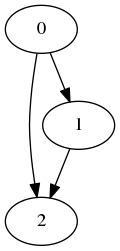

In [46]:
import networkx as nx

G = nx.DiGraph()

# figure out which node is what location in xs
Nx_inv = []
Nb_inv = []
for n in range(N):
    #print(n, Nx[n], Nb[n])
    for i in range(len(Nx[n])):
        Nx_inv.append(n)

    for i in range(len(Nb[n])):
        Nb_inv.append(n)

edges = []
for c in range(C):
    edges.append((str(Nb_inv[c]), str(Nx_inv[c]), 1))

for (u, v, w) in edges:
    G.add_edge(u, v, penwidth=w)
    
from IPython.display import Image, SVG, display
nx.nx_pydot.write_dot(G, '/tmp/graph.dot')

import os
os.system('dot -Tpng /tmp/graph.dot > /tmp/graph.png')
display(Image('/tmp/graph.png'))